In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np

### Загрузка данных

In [52]:
def dateparse1(x):
    if len(x) > 37:
        return datetime.datetime.strptime(x[:-21], '%Y-%m-%dT%H:%M:%S')
    else:
        return datetime.datetime.strptime(x[:-21], '%Y-%m-%dT%H:%M')

df_test = pd.read_csv('test_1_result.csv', sep=';', parse_dates=['Timestamp'], date_parser=dateparse1)

In [53]:
df_test.tail()

,Timestamp,Power from grid,Consumption,Accum set point,Stored energy
133626,2021-06-02 13:07:06,397.234461,0.0,43.919601,94.591714
133627,2021-06-02 13:07:07,402.958655,0.0,43.911793,94.578453
133628,2021-06-02 13:07:08,398.366637,0.0,43.903987,94.565195
133629,2021-06-02 13:07:09,401.615850,0.0,43.896181,94.551939
133630,2021-06-02 13:07:10,391.695643,NaN,NaN,NaN


In [57]:
def dateparse(x):
    return datetime.datetime.strptime(x, '%d.%m.%y %H:%M')
df_hours = pd.read_csv('scen_1_forecast_so_ko_hours.csv', sep=';', parse_dates=['dt'], date_parser=dateparse)

In [37]:
load_in = pd.read_csv('Нагрузка_БКТП.csv', sep=',')
load_in['timestamp'] =  pd.to_datetime(load_in['timestamp'], format='%Y-%m-%dT%H:%M:%S')

In [60]:
#группировка по 1H
load_1H = df_test.groupby(pd.Grouper(key='Timestamp', freq="1h")).mean().shift(1).fillna(0).reset_index(drop=False)


In [40]:
load_in_1H = load_in.groupby(pd.Grouper(key='timestamp', freq="1h")).mean().shift(1).fillna(0).reset_index(drop=False)
load_in_1H.head()

,timestamp,p_load
0,2021-06-01 00:00:00,0.000000
1,2021-06-01 01:00:00,344.820175
2,2021-06-01 02:00:00,338.157706
3,2021-06-01 03:00:00,291.936147
4,2021-06-01 04:00:00,288.671076


In [55]:
load_1H.tail()

,Timestamp,Power from grid,Consumption,Accum set point,Stored energy
33,2021-06-02 09:00:00,465.354859,0.0,-0.103933,99.856559
34,2021-06-02 10:00:00,530.028247,0.0,-0.103933,99.952177
35,2021-06-02 11:00:00,555.710601,0.0,15.672081,91.166081
36,2021-06-02 12:00:00,545.304874,0.0,-9.224567,87.170318
37,2021-06-02 13:00:00,477.359763,0.0,-9.296121,95.722596


In [58]:
df_hours.tail()

,dt,so_h_forec,ko_h_forec,max.consumption,power_forecast
715,2021-06-30 19:00:00,1,0.0,0,"454,0645595"
716,2021-06-30 20:00:00,1,0.0,0,"469,7184758"
717,2021-06-30 21:00:00,0,0.0,0,"529,2829726"
718,2021-06-30 22:00:00,0,0.0,0,"546,5433178"
719,2021-06-30 23:00:00,0,0.0,0,"514,4937657"


In [61]:
load_fact=load_1H['Power from grid'].reset_index(drop=True)
load_DR=df_hours['max.consumption'].reset_index(drop=True)
#print(load_DR, load_fact)
#массив с величинами снижения
DR = np.where(load_DR!=0, load_DR-load_fact, 0)
print(type(DR))
DR = pd.DataFrame(DR)
load_1H['DR_decrease']=DR
load_1H['max.consumption']=load_DR
load_1H['total_load']=load_in_1H['p_load']
load_1H.drop(['Stored energy', 'Consumption'], axis=1, inplace=True)
load_1H.head(40)

<class 'numpy.ndarray'>


,Timestamp,Power from grid,Accum set point,DR_decrease,max.consumption,total_load
0,2021-06-01 00:00:00,0.000000,0.000000,0.000000,0,0.000000
1,2021-06-01 01:00:00,351.998794,-7.180628,0.000000,0,344.820175
2,2021-06-01 02:00:00,345.441355,-7.283678,0.000000,0,338.157706
3,2021-06-01 03:00:00,299.338099,-7.401989,0.000000,0,291.936147
4,2021-06-01 04:00:00,296.224227,-7.553199,0.000000,0,288.671076
5,2021-06-01 05:00:00,369.217891,-7.761506,0.000000,0,361.456455
6,2021-06-01 06:00:00,389.852806,-8.093957,0.000000,0,381.758974
7,2021-06-01 07:00:00,415.860114,-8.638636,0.000000,0,407.220272
8,2021-06-01 08:00:00,447.581895,-0.002772,0.000000,0,447.578010
9,2021-06-01 09:00:00,500.716964,0.000000,0.000000,0,500.716964


### Общий график

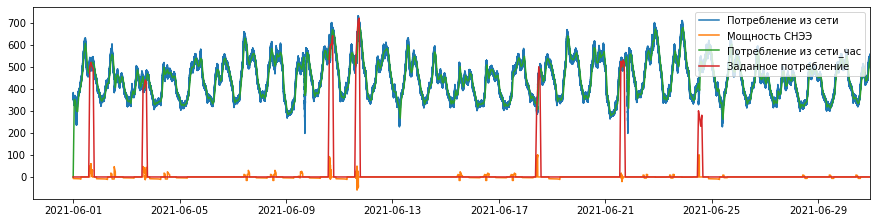

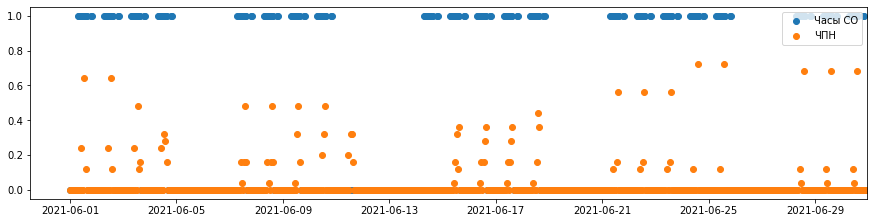

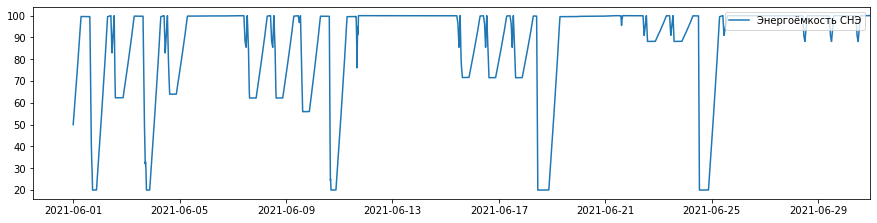

In [10]:
start_date = df_test.Timestamp[0]
end_date = df_test.Timestamp[len(df_test) - 1]


plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
#plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.plot(load_1H['Timestamp'], load_1H['Power from grid'], label='Потребление из сети_час')
plt.plot(df_hours['dt'], df_hours['max.consumption'], label='Заданное потребление')
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

### График на определённый день

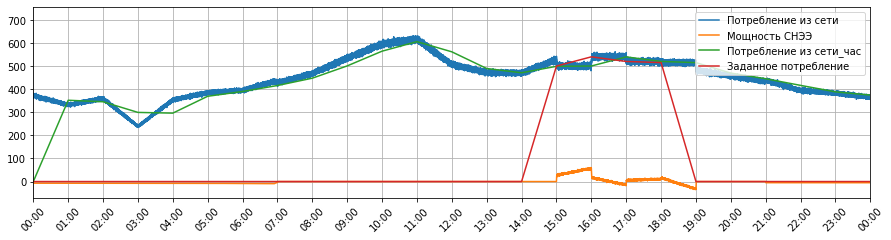

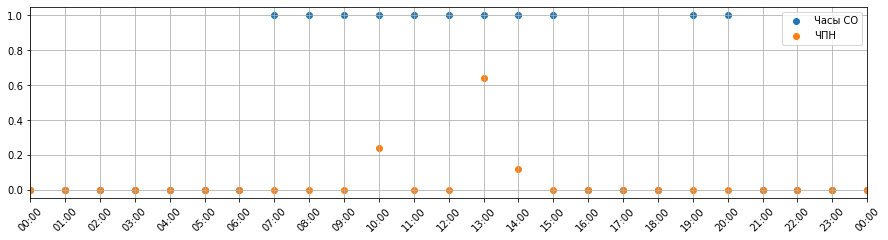

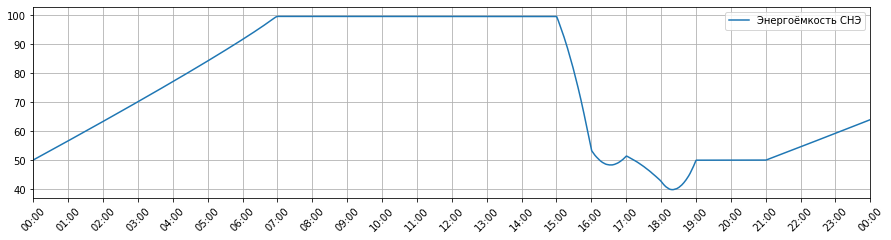

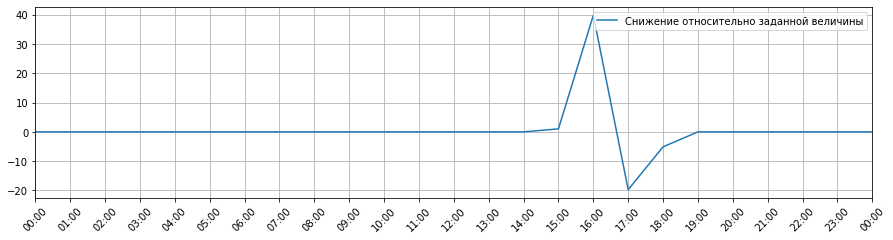

In [62]:
# Номер дня
day_number = 1
start_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number - 1)
end_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number)

myFmt = mdates.DateFormatter('%H:%M')

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
#plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.plot(load_1H['Timestamp'], load_1H['Power from grid'], label='Потребление из сети_час')
plt.plot(df_hours['dt'], df_hours['max.consumption'], label='Заданное потребление')
plt.xlim([start_date, end_date])
#plt.ylim(ymin=-200,ymax=700)
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2).xaxis.set_major_formatter(myFmt)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3).xaxis.set_major_formatter(myFmt)
plt.plot(load_1H['Timestamp'], load_1H['DR_decrease'], label='Снижение относительно заданной величины')
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

In [28]:
pd.read_csv??

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

In [64]:
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

In [65]:
multilabel_confusion_matrix??

Signature:
multilabel_confusion_matrix(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    labels=None,
    samplewise=False,
)
Source:   
@_deprecate_positional_args
def multilabel_confusion_matrix(y_true, y_pred, *, sample_weight=None,
                                labels=None, samplewise=False):
    """Compute a confusion matrix for each class or sample

    .. versionadded:: 0.21

    Compute class-wise (default) or sample-wise (samplewise=True) multilabel
    confusion matrix to evaluate the accuracy of a classification, and output
    confusion matrices for each class or sample.

    In multilabel confusion matrix :math:`MCM`, the count of true negatives
    is :math:`MCM_{:,0,0}`, false negatives is :math:`MCM_{:,1,0}`,
    true positives is :math:`MCM_{:,1,1}` and false positives is
    :math:`MCM_{:,0,1}`.

    Multiclass data will be treated as if binarized under a one-vs-rest
    transformation. Returned confusion matrices will be in the order of
    sorted unique 